In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
ins_df = pd.read_csv('car_insurance_claim.csv')

In [3]:
ins_df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16-Mar-39,60,0,11.0,"$67,349",No,$0,No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21-Jan-56,43,0,11.0,"$91,449",No,"$257,252",No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18-Nov-51,48,0,11.0,"$52,881",No,$0,No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,5-Mar-64,35,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,5-Jun-48,51,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


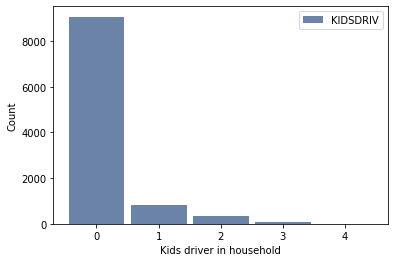

<Figure size 576x432 with 0 Axes>

In [4]:
hist = thinkstats2.Hist(ins_df.KIDSDRIV, label="KIDSDRIV")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="Kids driver in household", ylabel="Count")

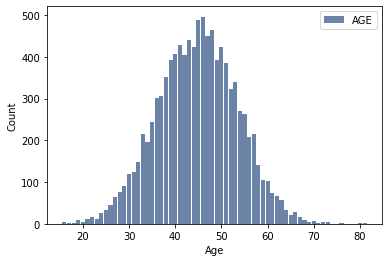

<Figure size 576x432 with 0 Axes>

In [5]:
hist = thinkstats2.Hist(ins_df.AGE, label="AGE")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="Age", ylabel="Count")

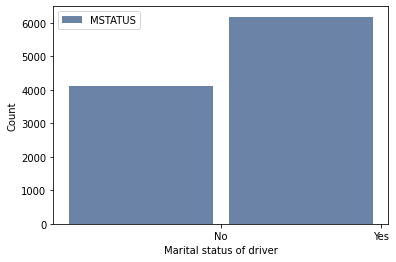

<Figure size 576x432 with 0 Axes>

In [6]:
hist = thinkstats2.Hist(ins_df.MSTATUS, label="MSTATUS")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="Marital status of driver", ylabel="Count")

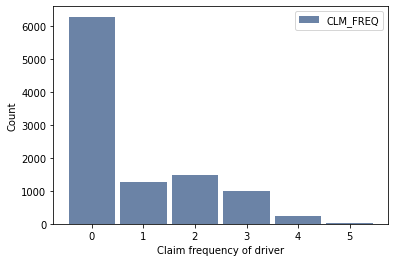

<Figure size 576x432 with 0 Axes>

In [7]:
hist = thinkstats2.Hist(ins_df.CLM_FREQ, label="CLM_FREQ")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="Claim frequency of driver", ylabel="Count")

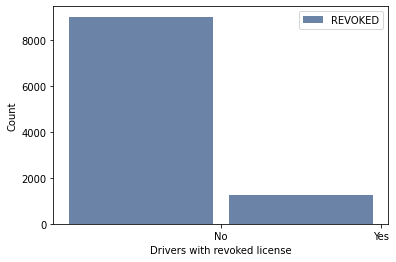

<Figure size 576x432 with 0 Axes>

In [8]:
hist = thinkstats2.Hist(ins_df.REVOKED, label="REVOKED")
thinkplot.Hist(hist)
thinkplot.Show(xlabel="Drivers with revoked license", ylabel="Count")

In [9]:
np.mean(ins_df.KIDSDRIV)

0.1694026226323458

In [10]:
stats.mode(ins_df.KIDSDRIV)

ModeResult(mode=array([0]), count=array([9062]))

In [11]:
np.median(ins_df.KIDSDRIV)

0.0

In [12]:
def detect_outlier(data_1):
    outliers=[]
    threshold=6
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [13]:
outliers = detect_outlier(ins_df.KIDSDRIV)
outliers

[4, 4, 4, 4]

In [14]:
np.median(ins_df.AGE)

45.0

In [15]:
np.mean(ins_df.AGE)

44.83739679456047

In [16]:
stats.mode(ins_df.AGE)

ModeResult(mode=array([46]), count=array([496]))

In [17]:
outliers = detect_outlier(ins_df.AGE)
outliers

[]

In [18]:
np.mean(ins_df.CLM_FREQ)

0.8004856726566294

In [19]:
stats.mode(ins_df.CLM_FREQ)

ModeResult(mode=array([0]), count=array([6289]))

In [20]:
np.median(ins_df.CLM_FREQ)

0.0

In [21]:
outliers = detect_outlier(ins_df.CLM_FREQ)
outliers

[]

In [22]:
# Splitting variables REVOKED and MSTATUS to show probabilty mass functions
revoked = ins_df[ins_df['REVOKED'] == "Yes"]
not_revoked =ins_df[ins_df['REVOKED'] == "No"]

single = ins_df[ins_df['MSTATUS'] == "No"]
married = ins_df[ins_df['MSTATUS'] == "Yes"]

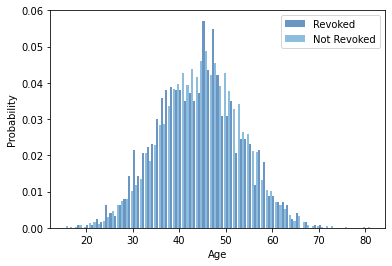

<Figure size 576x432 with 0 Axes>

In [23]:
revoked_pmf = thinkstats2.Pmf(revoked.AGE)
not_revoked_pmf = thinkstats2.Pmf(not_revoked.AGE)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(revoked_pmf, align='left', width=width, label='Revoked')
thinkplot.Hist(not_revoked_pmf, align='right', width=width, label='Not Revoked')
thinkplot.Show(xlabel='Age', ylabel="Probability")

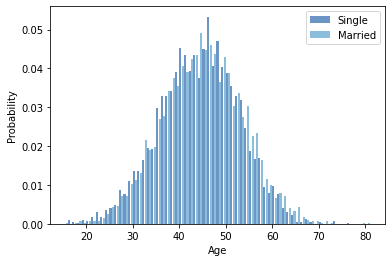

<Figure size 576x432 with 0 Axes>

In [24]:
single_pmf = thinkstats2.Pmf(single.AGE)
married_pmf = thinkstats2.Pmf(married.AGE)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(single_pmf, align='left', width=width, label='Single')
thinkplot.Hist(married_pmf, align='right', width=width, label='Married')
thinkplot.Show(xlabel='Age', ylabel="Probability")

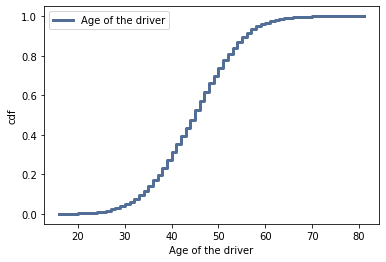

<Figure size 576x432 with 0 Axes>

In [25]:
# Cumulative distribution function for AGE
cdf = thinkstats2.Cdf(ins_df.AGE, label="Age of the driver")
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel="Age of the driver", ylabel="cdf")

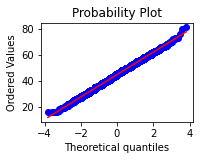

In [100]:
# Normal probability plot for AGE
ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=0, scale =1, size=len(ins_df))                 
res = stats.probplot(ins_df.AGE, plot=plt)                    
plt.show() 

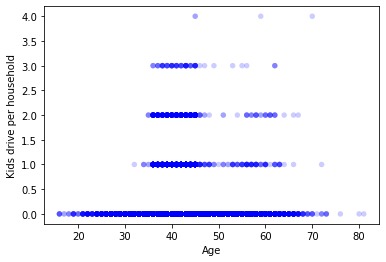

<Figure size 576x432 with 0 Axes>

In [17]:
# scatter plot- shows Relationship between KIDSDRIV and AGE 
thinkplot.Scatter(ins_df.AGE, ins_df.KIDSDRIV)
thinkplot.Show(xlabel="Age", ylabel="Kids drive per household")

In [111]:
thinkstats2.Corr(ins_df.KIDSDRIV, ins_df.AGE)

-0.07842707566543378

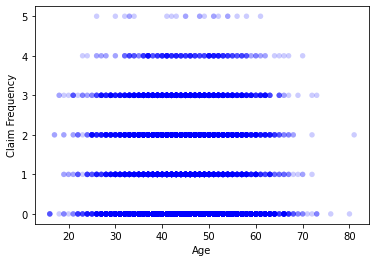

<Figure size 576x432 with 0 Axes>

In [116]:
# scatter plot - shows Relationship between AGE and CLM_FREQ
thinkplot.Scatter(ins_df.AGE, ins_df.CLM_FREQ)
thinkplot.Show(xlabel="Age", ylabel="Claim Frequency")

In [117]:
thinkstats2.Corr(ins_df.AGE, ins_df.CLM_FREQ)

-0.037640832468942904

In [118]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [129]:
# Hypothesis testing - does age contribute to the claims frequency
data = ins_df.AGE, ins_df.CLM_FREQ
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [144]:
# logistic regression model- CLAIM_FLAG is dependent variable, all other variables are independent variables
model = smf.logit('CLAIM_FLAG ~ AGE + KIDSDRIV + CLM_FREQ + MSTATUS + REVOKED', data = ins_df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.531450
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             CLAIM_FLAG   No. Observations:                10295
Model:                          Logit   Df Residuals:                    10289
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                 0.08274
Time:                        11:58:12   Log-Likelihood:                -5471.3
converged:                       True   LL-Null:                       -5964.8
Covariance Type:            nonrobust   LLR p-value:                3.750e-211
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2812      0.127     -2.220      0.026      -0.529      -0.033
MSTATUS[T.Yes]   